In [2]:
import torch as t
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Linear Regression with Noise

torch.Size([100, 1]) torch.Size([100, 1])
epoch: 10, loss = 3993.2771
epoch: 20, loss = 2921.7117
epoch: 30, loss = 2145.4897
epoch: 40, loss = 1582.6573
epoch: 50, loss = 1174.1803
epoch: 60, loss = 877.4789
epoch: 70, loss = 661.8006
epoch: 80, loss = 504.9081
epoch: 90, loss = 390.7040
epoch: 100, loss = 307.5236
epoch: 110, loss = 246.9060
epoch: 120, loss = 202.7090
epoch: 130, loss = 170.4695
epoch: 140, loss = 146.9428
epoch: 150, loss = 129.7673
epoch: 160, loss = 117.2242
epoch: 170, loss = 108.0612
epoch: 180, loss = 101.3655
epoch: 190, loss = 96.4715
epoch: 200, loss = 92.8935
epoch: 210, loss = 90.2770
epoch: 220, loss = 88.3634
epoch: 230, loss = 86.9634
epoch: 240, loss = 85.9392
epoch: 250, loss = 85.1897
epoch: 260, loss = 84.6412
epoch: 270, loss = 84.2396
epoch: 280, loss = 83.9457
epoch: 290, loss = 83.7305
epoch: 300, loss = 83.5730
epoch: 310, loss = 83.4576
epoch: 320, loss = 83.3731
epoch: 330, loss = 83.3113
epoch: 340, loss = 83.2660
epoch: 350, loss = 83.2328

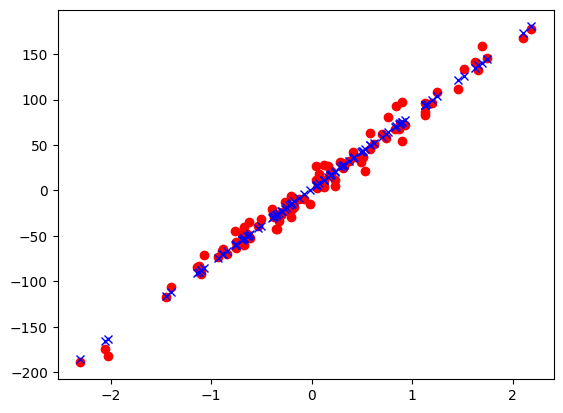

In [3]:
#Prepare data
#Generates random regression problem, outputs input samples and their corresponding output values
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=1) 

X = t.from_numpy(X_numpy.astype(np.float32))
Y = t.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) #reshape to match X tensor
print(X.shape, Y.shape)

n_samples, n_features = X.shape

#Model
input_size = n_features
output_size = 1 #one value for each sample
model = nn.Linear(input_size, output_size)

#Loss and Optimiser
learning_rate = 0.01
l = nn.MSELoss()
optimiser = t.optim.SGD(model.parameters(), lr = learning_rate)

#Training
iterations = 1000
for epoch in range(iterations):
    #Forward pass and loss
    y_predicted = model(X)
    loss = l(y_predicted, Y)    
    
    #Backward pass
    loss.backward() #sums up gradients into .grad attribute of X

    #Update
    optimiser.step()
    optimiser.zero_grad()

    if (epoch + 1) % 10 ==0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy() #prevent operation from being added to computational graph
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted,  'bx')
plt.show()

### Logistic Regression

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Prepare date

#Binary classification problem
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target
#X has 569 rows and 30 columns
#569 samples, each with 30 different features 
n_samples, n_features = X.shape 

#Split data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)#test size 20%
#Scale- Recommended for logistic regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))
Y_train = t.from_numpy(Y_train.astype(np.float32))
Y_test = t.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1) #reshape to have match X, column vector
Y_test = Y_test.view(Y_test.shape[0], 1)

#Model
#f(x) = wx+b, sigmoid function applied at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) #Define layer using built in linear layer. Takes
        #input size and output size- want only one output

    def forward(self, x):
        y_predicted = t.sigmoid(self.linear(x))
        return y_predicted 
    
model = LogisticRegression(n_features)

#Loss and Optimiser
learning_rate = 0.01
criterion = nn.BCELoss() #Binary Cross entropy loss. Used for logistic regression
optimiser = t.optim.SGD(model.parameters(), lr=learning_rate)

#Training Loop
iterations = 100
for epoch in range(iterations):
    # - Forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, Y_train)

    # - Backward pass
    loss.backward()

    # - Update
    optimiser.step()
    optimiser.zero_grad()

    if (epoch + 1) % 10 ==0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

with t.no_grad(): #don't track gradient
    y_predicted = model(X_test)
    y_predicted_classes = y_predicted.round() #sigmoid gives value between zero and one
    accuracy = y_predicted_classes.eq(Y_test).sum()/float(Y_test.shape[0])
    print(f'accuracy = {accuracy:.4f}')
    print(model)



epoch: 10, loss = 0.5547
epoch: 20, loss = 0.4625
epoch: 30, loss = 0.4021
epoch: 40, loss = 0.3594
epoch: 50, loss = 0.3276
epoch: 60, loss = 0.3028
epoch: 70, loss = 0.2829
epoch: 80, loss = 0.2665
epoch: 90, loss = 0.2527
epoch: 100, loss = 0.2409
accuracy = 0.8947
LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)


### Feed Forward Neural Network

Using the famous MNIST dataset

torch.Size([100, 1, 28, 28]) torch.Size([100])

Above prints the size of the sample, 1 channel as there are 
no colour channels in the image. The image array is 28x28.

Labels is size 100 so for each class label (sample size?) we have only one value. 

Plot to check data loaded properly:


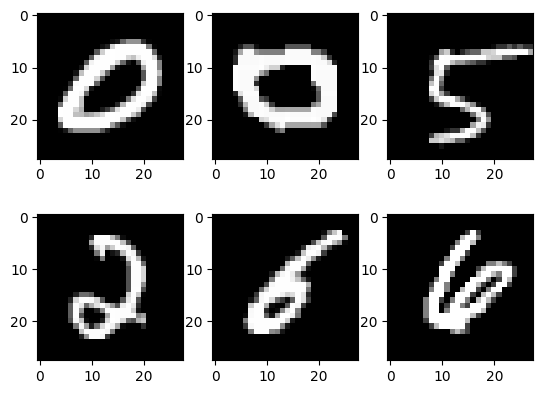

In [21]:
#Load data and mould into suitable form
import torchvision
import torchvision.transforms as transforms

#hyper parameters
input_size = 784 #28x28
hidden_size = 100
num_classes = 10 #0-9 digits
num_epochs = 2
batch_size = 100
learning_rate = 0.01

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./Data', train=True,
transform=transforms.ToTensor(), download=True) #transforms turns PIL images into tensors

test_dataset = torchvision.datasets.MNIST(root='/.Data', train=False, 
transform=transforms.ToTensor(), download=True)

train_loader = t.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = t.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.__next__()

print(samples.shape, labels.shape)
print()
print("""Above prints the size of the sample, 1 channel as there are 
no colour channels in the image. The image array is 28x28.""")
print()
print("""Labels is size 100 so for each class label (sample size?) we have only one value. """)
print()
print("Plot to check data loaded properly:")

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap = 'gray')
plt.show()


In [ ]:
#Now create feed-forward neural network

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) #linear layer. 
        #Output size is the hidden size. This step performs a linear transformation on the input 
        #to reshape it to fit the number of hidden layers in the neural network
        self.relu = nn.ReLU() #activation function
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out 
    
model = NeuralNet(input_size, hidden_size, num_classes)

#Loss and optimiser
criterion = nn.CrossEntropyLoss()
optimiser = t.optim.Adam(model.parameters(), lr = learning_rate)

#Training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape 100, 1, 28, 28
        # to 100, 784
        images = images.reshape(-1, 28*28)

        #forward 
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        if (i + 1) % 100 == 0:
            print(f'epoch: {epoch + 1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')

#test and evaluation
with t.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images) #trained model now

        _, predictions = t.max(outputs, 1) #returns value and index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    accuracy = 100*n_correct / n_samples
    print(f'Accuracy = {accuracy}')

epoch: 1 / 2, step 100 / 600, loss = 0.1842
epoch: 1 / 2, step 200 / 600, loss = 0.2033
epoch: 1 / 2, step 300 / 600, loss = 0.1096
epoch: 1 / 2, step 400 / 600, loss = 0.0956
epoch: 1 / 2, step 500 / 600, loss = 0.0743
epoch: 1 / 2, step 600 / 600, loss = 0.1771
epoch: 2 / 2, step 100 / 600, loss = 0.1044
epoch: 2 / 2, step 200 / 600, loss = 0.1352
epoch: 2 / 2, step 300 / 600, loss = 0.0825
epoch: 2 / 2, step 400 / 600, loss = 0.1341
epoch: 2 / 2, step 500 / 600, loss = 0.1322
epoch: 2 / 2, step 600 / 600, loss = 0.1869
Accuracy = 96.63


: 